In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [152]:
os.chdir("C:/Users/Akshay/Desktop")

In [153]:
cust = pd.read_csv("./Credit_Card/Customer Acqusition.csv")
rep = pd.read_csv("./Credit_Card/Repayment.csv")
spe = pd.read_csv("./Credit_Card/spend.csv")

In [154]:
cust

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


### 1. In the above dataset,
 #### a. In case age is less than 18, replace it with mean of age values.

In [155]:
cust.loc[cust["Age"] < 18, "Age"] = cust['Age'].mean()
cust

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
### (customer’s limit provided in acquisition table is the per transaction limit on his card)
 

In [156]:
#merging customer and spend table on the basis of "Customer" column
spend_amt = pd.merge(left=cust,right=spe,on="Customer",how="inner")

In [157]:
spend_amt.loc[spend_amt["Amount"] > spend_amt["Limit"],"Amount"] = (0.50 * spend_amt["Limit"])
spend_amt

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00


 ### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [158]:
repay_amt = pd.merge(left=rep,right=cust,on="Customer",how="inner")

In [159]:
repay_amt.head()

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,12-Jan-04,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,03-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,15-Jan-04,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,25-Jan-04,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,17-Jan-05,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [160]:
repay_amt.loc[repay_amt['Amount'] > repay_amt['Limit'],"Amount"] = repay_amt["Limit"]

In [161]:
repay_amt

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,12-Jan-04,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,03-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,15-Jan-04,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,25-Jan-04,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,17-Jan-05,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...
1495,277.0,A7,22-Nov-05,55108.71,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,295.0,A7,03-Dec-05,100001.00,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,313.0,A7,23-Feb-05,100001.00,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,331.0,A7,31-Mar-06,100001.00,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


### 2. From the above dataset create the following summaries:
 #### a. How many distinct customers exist?

In [162]:
print("Number of distinct customers =",cust['Customer'].nunique())

Number of distinct customers = 100


####  b. How many distinct categories exist?

In [163]:
cust["Segment"].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_Pvt     13
Salaried_MNC     13
Name: Segment, dtype: int64

#### c. What is the average monthly spend by customers?

In [164]:
spe['Month'] = pd.to_datetime(spe['Month'])

In [165]:
spe['Monthly'] = spe['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spe['Yearly'] = spe['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
spe.head()

,Sl No:,Customer,Month,Type,Amount,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005


In [166]:
#group the dataset based on 'Yearly' and 'monthly' values
avg_spe_mnthly= round(spe.groupby(['Yearly','Monthly']).mean(),4)
avg_spe_mnthly

Sl No:       Amount
Yearly Monthly                         
2004   April      730.5000  235272.0371
       February   749.5000  221215.2700
       January    751.6221  251712.0687
       March      725.5000  232146.1193
       May        733.5000  217539.2364
       November   745.5000  270486.3979
       September  741.5000  310923.3836
2005   April      730.0000  252181.3264
       August     749.5000  233734.6343
       December   762.5000  147503.0600
       February   750.6667  229802.2798
       January    746.5000  292741.3729
       July       757.5000  229116.6636
       June       755.5000  262688.1129
       May        747.3000  245696.5154
       November   749.5000  286143.3229
       October    760.5000  194568.6407
       September  759.5000  188666.2021
2006   April      744.4149  232468.9676
       August     770.5000  240699.7171
       December   774.5000  270470.9807
       February   757.8333  253858.2607
       January    763.5000  282058.0064
       July       754.5000  287505.0989
       June       768.5000  177252.3864
       March      750.9032  247166.0847
       May        744.2500  236162.7404
       November   758.5000  182841.2900
       October    772.5000  236136.3350
       September  771.5000  158520.0907

####  d. What is the average monthly repayment by customers

In [167]:
rep['Month'] = pd.to_datetime(rep['Month'])

In [168]:
rep['Monthly'] = rep['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
rep['Yearly'] = rep['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [169]:
#group the dataset based on 'Yearly' and 'monthly' values
avg_rep_mnthly= round(rep.groupby(['Yearly','Monthly']).mean(),2)
avg_rep_mnthly

SL No:     Amount
Yearly Monthly                     
2004   April      805.07  259141.68
       February   764.33  256702.63
       January    746.66  243489.65
       March      800.07  252585.28
       May        760.80  226162.72
       November   744.93  209592.24
       September  788.38  184487.85
2005   April      804.57  212688.63
       August     748.05  264430.92
       December   710.92  320379.34
       February   765.50  238829.27
       January    761.33  240548.10
       July       705.92  239871.48
       June       703.92  210199.82
       May        738.08  263207.37
       November   733.50  256695.12
       October    708.92  219849.96
       September  707.92  247700.17
2006   April      763.03  275472.25
       August     718.92  224143.99
       December   722.92  252736.57
       February   751.97  284489.57
       January    711.92  293475.39
       July       750.95  257936.38
       June       716.92  251990.45
       March      757.00  240851.27
       May        757.20  256920.88
       November   733.59  199399.20
       October    720.92  260765.48
       September  719.92  262533.88

####  e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
#### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
#### – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [170]:
cus_spend_repay = pd.merge(left=spend_amt,right=rep,on="Customer",how="inner")

In [171]:
cus_spend_repay.rename(columns={"Amount_x":"Spend_Amount","Amount_y":"Repay_Amount"},inplace=True)

In [172]:
monthly_interest = cus_spend_repay.groupby(["Yearly","Monthly"])['Spend_Amount','Repay_Amount'].sum()
monthly_interest

<ipython-input-172-0f6c8e456cac>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_interest = cus_spend_repay.groupby(["Yearly","Monthly"])['Spend_Amount','Repay_Amount'].sum()


Spend_Amount  Repay_Amount
Yearly Monthly                              
2004   April      1.194516e+08  2.285403e+08
       February   7.613922e+07  1.602419e+08
       January    1.088357e+09  1.699210e+09
       March      5.594171e+07  8.974470e+07
       May        8.800456e+07  1.411594e+08
       November   5.504612e+07  7.860290e+07
       September  5.144278e+07  8.016122e+07
2005   April      9.366405e+07  1.747894e+08
       August     1.361400e+08  2.477449e+08
       December   4.348638e+07  9.944533e+07
       February   5.890557e+08  9.416163e+08
       January    1.324129e+08  1.810333e+08
       July       3.995653e+07  7.997268e+07
       June       1.174019e+08  2.213774e+08
       May        7.149030e+08  1.099197e+09
       November   1.532278e+08  2.763119e+08
       October    3.140993e+07  6.027830e+07
       September  3.195551e+07  7.530449e+07
2006   April      3.229722e+08  6.093666e+08
       August     5.849630e+07  7.167032e+07
       December   4.585222e+07  7.087702e+07
       February   1.654843e+08  2.903280e+08
       January    5.127574e+07  8.974491e+07
       July       1.444093e+08  2.245720e+08
       June       5.302118e+07  6.914431e+07
       March      7.393854e+08  1.115725e+09
       May        3.297954e+08  5.434823e+08
       November   1.124836e+08  1.355832e+08
       October    5.285823e+07  7.890924e+07
       September  5.395681e+07  8.083199e+07

In [173]:
monthly_interest['Monthly Profit'] = monthly_interest['Repay_Amount'] - monthly_interest['Spend_Amount']

In [174]:
#interest earned is 2.9% of Monthly Profit
monthly_interest['Interest Earned'] =0.29* monthly_interest['Monthly Profit']
monthly_interest

Spend_Amount  Repay_Amount  Monthly Profit  Interest Earned
Yearly Monthly                                                               
2004   April      1.194516e+08  2.285403e+08    1.090887e+08     3.163572e+07
       February   7.613922e+07  1.602419e+08    8.410268e+07     2.438978e+07
       January    1.088357e+09  1.699210e+09    6.108525e+08     1.771472e+08
       March      5.594171e+07  8.974470e+07    3.380298e+07     9.802865e+06
       May        8.800456e+07  1.411594e+08    5.315485e+07     1.541491e+07
       November   5.504612e+07  7.860290e+07    2.355678e+07     6.831466e+06
       September  5.144278e+07  8.016122e+07    2.871844e+07     8.328349e+06
2005   April      9.366405e+07  1.747894e+08    8.112539e+07     2.352636e+07
       August     1.361400e+08  2.477449e+08    1.116049e+08     3.236542e+07
       December   4.348638e+07  9.944533e+07    5.595895e+07     1.622810e+07
       February   5.890557e+08  9.416163e+08    3.525606e+08     1.022426e+08
       January    1.324129e+08  1.810333e+08    4.862042e+07     1.409992e+07
       July       3.995653e+07  7.997268e+07    4.001615e+07     1.160468e+07
       June       1.174019e+08  2.213774e+08    1.039755e+08     3.015290e+07
       May        7.149030e+08  1.099197e+09    3.842944e+08     1.114454e+08
       November   1.532278e+08  2.763119e+08    1.230841e+08     3.569438e+07
       October    3.140993e+07  6.027830e+07    2.886837e+07     8.371827e+06
       September  3.195551e+07  7.530449e+07    4.334898e+07     1.257121e+07
2006   April      3.229722e+08  6.093666e+08    2.863944e+08     8.305437e+07
       August     5.849630e+07  7.167032e+07    1.317402e+07     3.820465e+06
       December   4.585222e+07  7.087702e+07    2.502480e+07     7.257193e+06
       February   1.654843e+08  2.903280e+08    1.248436e+08     3.620465e+07
       January    5.127574e+07  8.974491e+07    3.846917e+07     1.115606e+07
       July       1.444093e+08  2.245720e+08    8.016271e+07     2.324719e+07
       June       5.302118e+07  6.914431e+07    1.612313e+07     4.675707e+06
       March      7.393854e+08  1.115725e+09    3.763400e+08     1.091386e+08
       May        3.297954e+08  5.434823e+08    2.136869e+08     6.196920e+07
       November   1.124836e+08  1.355832e+08    2.309955e+07     6.698869e+06
       October    5.285823e+07  7.890924e+07    2.605102e+07     7.554795e+06
       September  5.395681e+07  8.083199e+07    2.687518e+07     7.793803e+06

####  f. What are the top 5 product types

In [175]:
spe['Type'].value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

#### g. Which city is having maximum spend?

In [176]:
max_city_spend = spend_amt.groupby("City")["Amount"].sum().sort_values(ascending=False)
max_city_spend

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

#### h. Which age group is spending more money?

In [177]:
#creating new column "Age Group" with 8 bins between 18 to 88 
spend_amt["Age Group"] =  pd.cut(spend_amt["Age"]
                                 ,bins=np.arange(18,88,8),
                                 labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"],
                                 include_lowest=True)

In [178]:
#grouping data based on "Age Group" and finding the amount spend by each age group and arranging in descending oreder
spending_more = spend_amt.groupby("Age Group")['Amount'].sum().sort_values(ascending=False)
spending_more

Age Group
42-50    53242390.70
34-42    38037826.50
26-34    30553459.81
18-26    25233896.65
50-58    22454066.68
74-82    19770884.32
66-74    17705877.44
58-66    12782683.13
Name: Amount, dtype: float64

#### i. Who are the top 10 customers in terms of repayment

In [179]:
#grouping based on "Customer" column to find top 10 customers
repay_amt.groupby("Customer")[["Amount"]].sum().sort_values("Amount",ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [180]:
spend_amt["Month"] = pd.to_datetime(spend_amt['Month'])

In [181]:
spend_amt["Year"] = spend_amt["Month"].apply(lambda x:pd.Timestamp.strftime(x, format="%Y"))

In [182]:
spend_amt.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005


In [183]:
spend_amt_pivot = pd.pivot_table(data = spend_amt,index=["City","Year"],
                                 columns='Product',aggfunc="sum",values="Amount")

In [184]:
spend_amt_pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

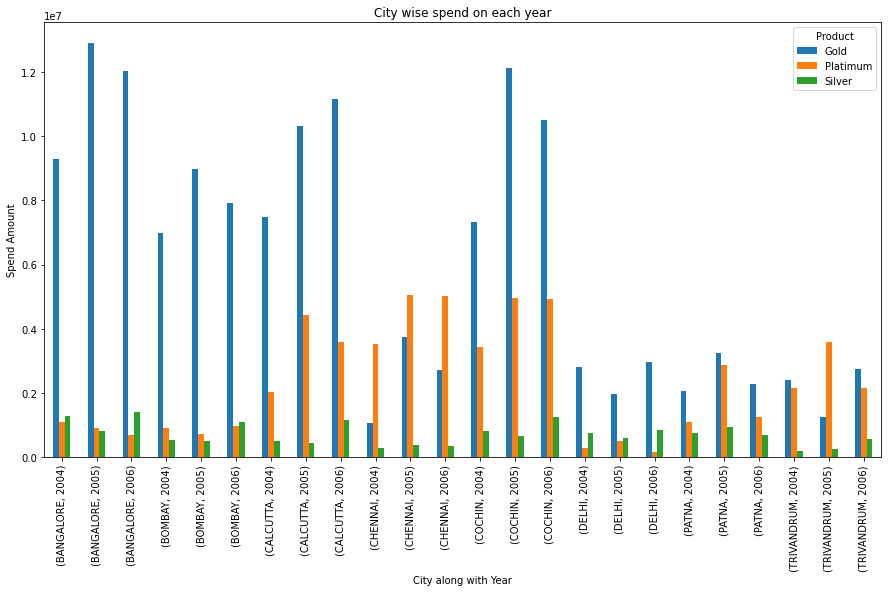

In [185]:
spend_amt_pivot.plot(kind="bar",figsize=(15,8))
plt.xlabel("City along with Year")
plt.ylabel("Spend Amount")
plt.title("City wise spend on each year")
plt.show()

### 4. Create graphs for
 #### a. Monthly comparison of total spends, city wise

In [186]:
spend_amt['Monthly'] = spend_amt['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))

In [187]:
city_monthly = spend_amt.groupby(['Monthly', 'City'])[["Amount"]].sum().reset_index()

In [188]:
city_monthly = pd.pivot_table(data=spend_amt, values="Amount", index="City", columns="Monthly", aggfunc='sum')

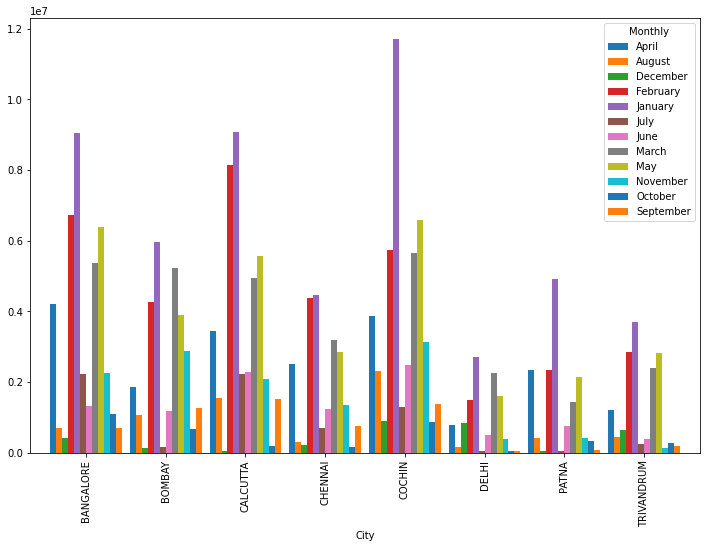

In [189]:
city_monthly.plot(kind = 'bar', figsize = (12,8),width = .9)
plt.show()

####  b. Comparison of yearly spend on air ticket

In [190]:
air_tickets = spend_amt.groupby(["Year", "Type"])[["Amount"]].sum().reset_index()

In [191]:
filtering = air_tickets.loc[air_tickets["Type"] == "AIR TICKET"]
filtering

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


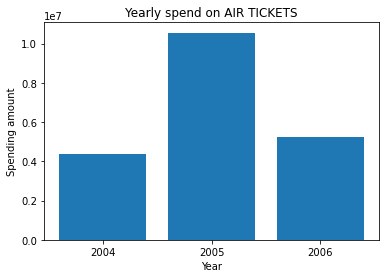

In [192]:
plt.bar(filtering["Year"],filtering["Amount"])
plt.xlabel("Year")
plt.ylabel("Spending amount")
plt.title("Yearly spend on AIR TICKETS")
plt.show()

#### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [193]:
each_prod_monthly = pd.pivot_table(data=spend_amt,index='Product',columns='Monthly',values='Amount',aggfunc='sum')

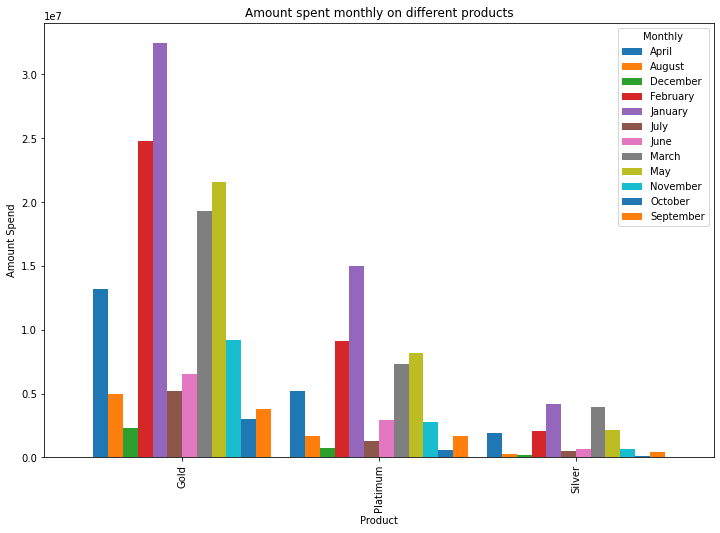

In [194]:
each_prod_monthly.plot(kind = 'bar', figsize = (12,8), width = .9)
plt.ylabel("Amount Spend")
plt.title("Amount spent monthly on different products")
plt.show()

### 5. Write user defined PYTHON function to perform the following analysis:
-- You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers --

In [195]:
repay_amt['Month'] = pd.to_datetime(repay_amt['Month'])

In [196]:
repay_amt['Monthly'] = repay_amt['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
repay_amt['Yearly'] = repay_amt['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [197]:
def summary_report(product,timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = repay_amt.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = repay_amt.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = repay_amt.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = repay_amt.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = repay_amt.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = repay_amt.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result


summary_report('silver','yearly')


Give the product name and timeperiod for which you want the data


Yearly                             2004        2005        2006
Product City       Customer                                    
Silver  BANGALORE  A18        491592.71   638296.41   700000.00
                   A23        664965.71  1000010.00   872925.32
                   A59        676557.50   427247.08   600018.00
                   A72        100000.00         NaN         NaN
                   A76              NaN   265619.05         NaN
                   A77              NaN         NaN     3159.62
        COCHIN     A100        69551.19         NaN         NaN
                   A25        786338.08   611555.69  1000030.00
                   A7         500005.00   422177.27   608997.87
                   A74              NaN   100002.00         NaN
                   A79              NaN         NaN   193230.31
        CALCUTTA   A2         400000.00   410274.00   200000.00
                   A58        533815.62   540173.85   411640.17
                   A73              NaN   100001.00         NaN
                   A78              NaN         NaN    55344.81
                   A87              NaN         NaN   100003.00
        BOMBAY     A22        953419.47  1141542.81   945271.83
                   A75              NaN   100003.00         NaN
                   A80              NaN         NaN   481205.64
        CHENNAI    A85              NaN         NaN   100001.00
                   A9         380193.34   500015.00   697845.29
                   A96        100000.00         NaN         NaN
        TRIVANDRUM A57       1000010.00   200002.00   655926.99
                   A68        100000.00         NaN   100000.00
                   A86              NaN         NaN   100002.00
        PATNA      A46        713614.32  1116730.89   839228.07
                   A8         800016.00   400008.00   531812.40
                   A84              NaN         NaN   100000.00
        DELHI      A24        397014.53  1184870.98   711068.52
                   A6         548574.15   427398.18   507280.51